In [ ]:
"""
    Plot the spectral axis of a data spaxel and overlay the best fit
    pyBBarolo model for comparison.
"""

In [1]:
%matplotlib inline

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

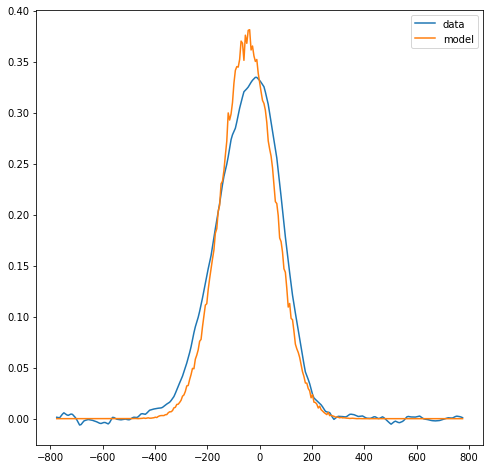

In [3]:
topPath = '/Volumes/QbertPrimary/umdResearch/adapProposalNearby/pySpecKitCube/maybeRun3/m82/1arc/3dBarolo/'

modelFitsFile = topPath + 'oiii88/m82mod_local.fits'
dataFitsFile = topPath + 'fits/1342186798_m82_oiii88_hdrEditVel.fits'


modelHdu = fits.open(modelFitsFile)
dataHdu = fits.open(dataFitsFile)

model = modelHdu[0].data
data = dataHdu[0].data

xlen = len(model[:,30,30])
step = modelHdu[0].header['CDELT3']
ref = modelHdu[0].header['CRVAL3']
start =  ref - ((xlen/2.)*abs(step))
stop = ref + ((xlen/2.)*abs(step))

vels = (np.array(np.linspace(start, stop, num=xlen)) - ref)# - ref

col,row = 20,20
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', edgecolor='k')
ax.plot(vels,data[:,col,row],label='data')
ax.plot(vels,model[:,col,row],label='model')
ax.legend(frameon=True)

plt.show()